In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
data = pd.read_csv('./IMBD.csv')

In [3]:
# Converter todos os valores para string antes de substituir vírgulas
data['votes'] = data['votes'].fillna(0).astype(str).str.replace(',', '').astype(int)

# Tratar a coluna 'duration' da mesma forma
data['duration'] = data['duration'].fillna(0).astype(str).str.replace(' min', '').astype(int)

# Extrair o primeiro gênero
data['primary_genre'] = data['genre'].str.split(',').str[0]

# Exibir as primeiras linhas para confirmar
print(data.head())


                    title         year certificate  duration  \
0               Cobra Kai     (2018– )       TV-14        30   
1               The Crown     (2016– )       TV-MA        58   
2        Better Call Saul  (2015–2022)       TV-MA        46   
3           Devil in Ohio       (2022)       TV-MA       356   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA        24   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                   

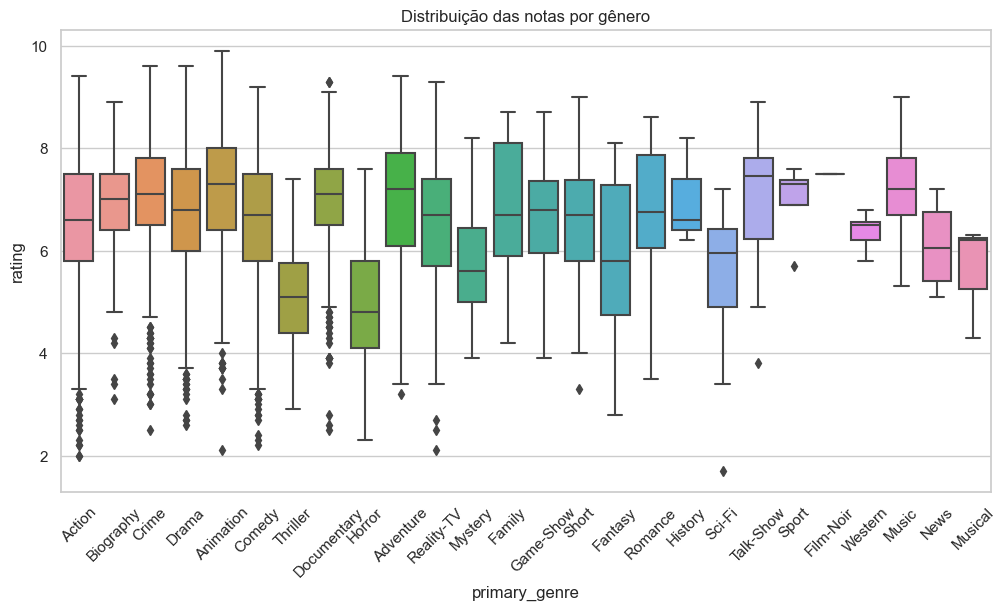

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_genre', y='rating', data=data)
plt.xticks(rotation=45)
plt.title('Distribuição das notas por gênero')
plt.show()


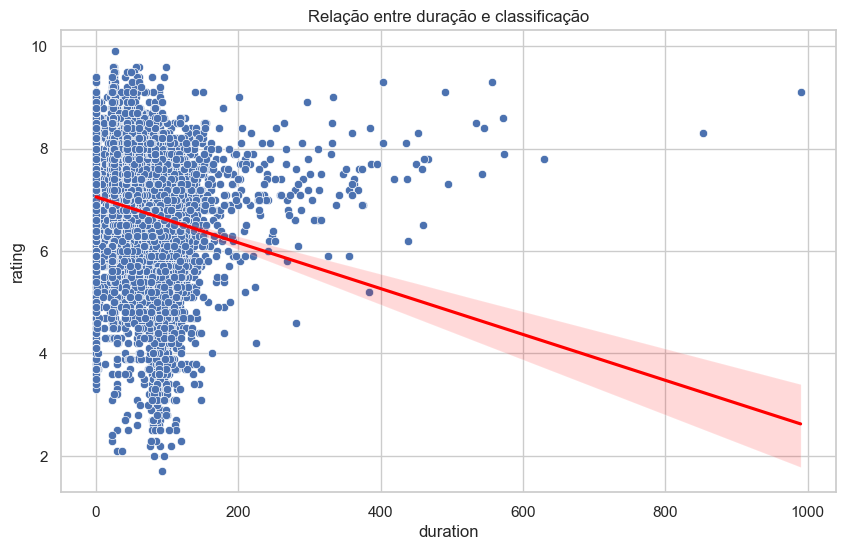

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating', data=data)
sns.regplot(x='duration', y='rating', data=data, scatter=False, color='red', label='Regressão Linear')
plt.title('Relação entre duração e classificação')
plt.show()

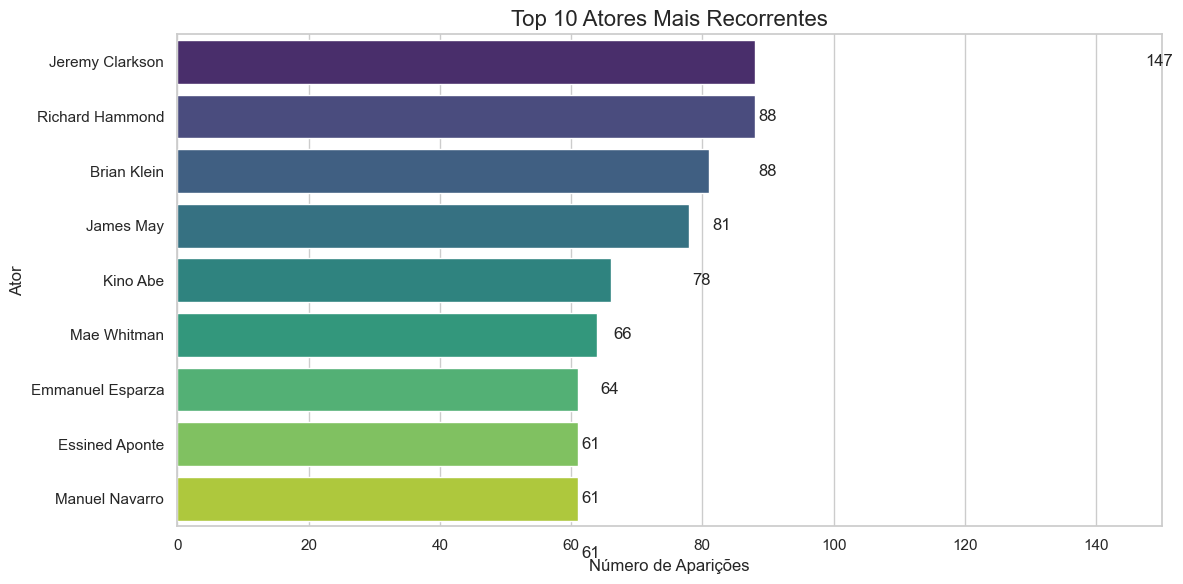

In [14]:
# Função para limpar e extrair nomes de atores
def clean_and_extract_actors(stars_string):
    # Remove caracteres especiais e palavras indesejadas
    cleaned = re.sub(r"[\[\]'\"|\n]", "", stars_string)
    cleaned = re.sub(r"Stars:|Star:", "", cleaned)
    # Divide a string em nomes de atores
    actors = [actor.strip() for actor in cleaned.split(',') if actor.strip()]
    return actors

# Aplicar a função de limpeza e criar uma lista de todos os atores
all_stars = data['stars'].apply(clean_and_extract_actors).explode()

# Contagem dos atores mais comuns
star_counts = Counter(all_stars)
top_actors = star_counts.most_common(10)

# Criar dataframe para visualização
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Count', y='Actor', data=actors_df, palette='viridis')

# Definir limite superior do eixo x
plt.xlim(0, 150)

plt.title('Top 10 Atores Mais Recorrentes', fontsize=16)
plt.xlabel('Número de Aparições', fontsize=12)
plt.ylabel('Ator', fontsize=12)

# Adicionar rótulos de contagem nas barras
for i, v in enumerate(actors_df['Count']):
    ax.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

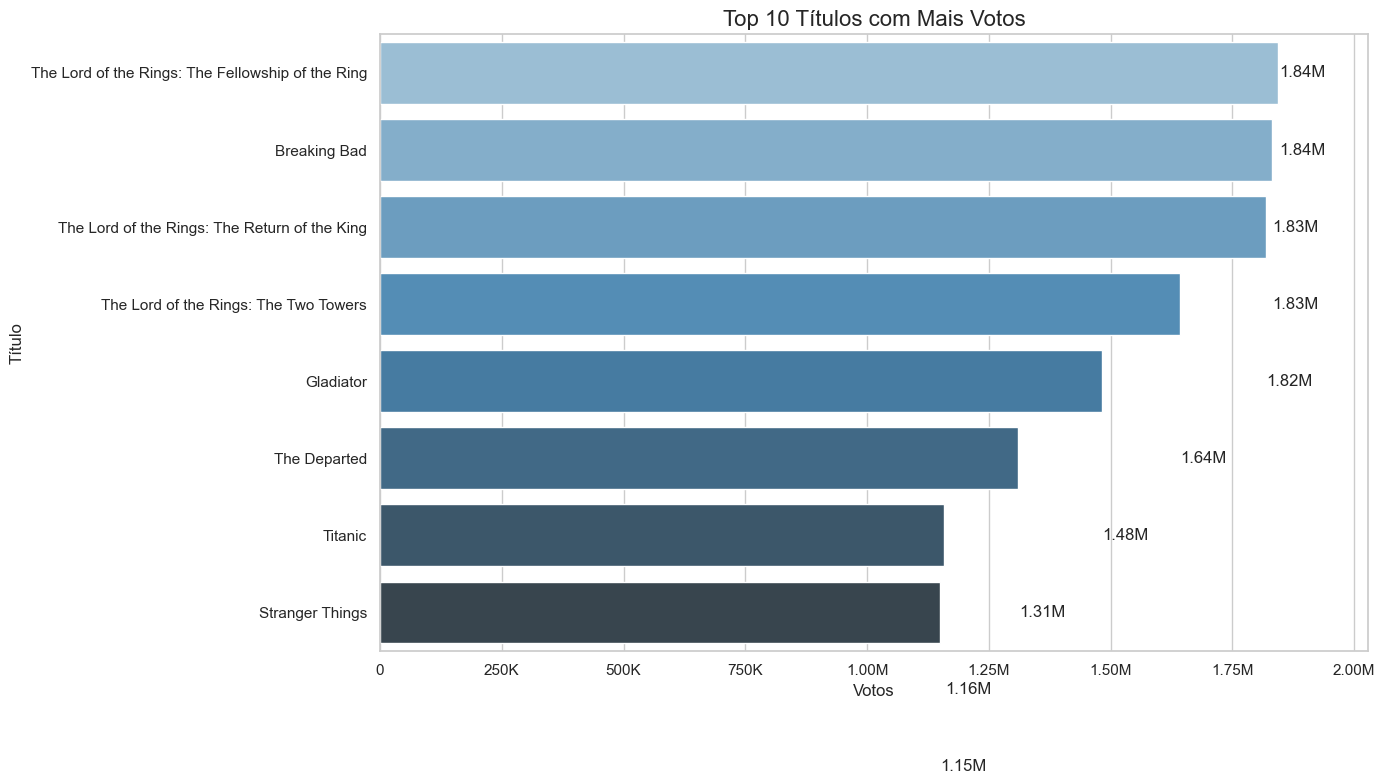

In [17]:
def format_number(num):
    if num >= 1e6:
        return f'{num/1e6:.2f}M'
    elif num >= 1e3:
        return f'{num/1e3:.0f}K'
    else:
        return f'{num:.0f}'

top_voted = data.sort_values('votes', ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='votes', y='title', data=top_voted, palette='Blues_d')


plt.title('Top 10 Títulos com Mais Votos', fontsize=16)
plt.xlabel('Votos', fontsize=12)
plt.ylabel('Título', fontsize=12)

# Adicionar rótulos de dados nas barras
for i, v in enumerate(top_voted['votes']):
    ax.text(v + 1000, i, format_number(v), va='center')

# Ajustar os limites do eixo x para dar espaço aos rótulos
plt.xlim(0, max(top_voted['votes']) * 1.1)

# Formatar o eixo x para usar notação de milhões
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_number(x)))

plt.tight_layout()
plt.show()

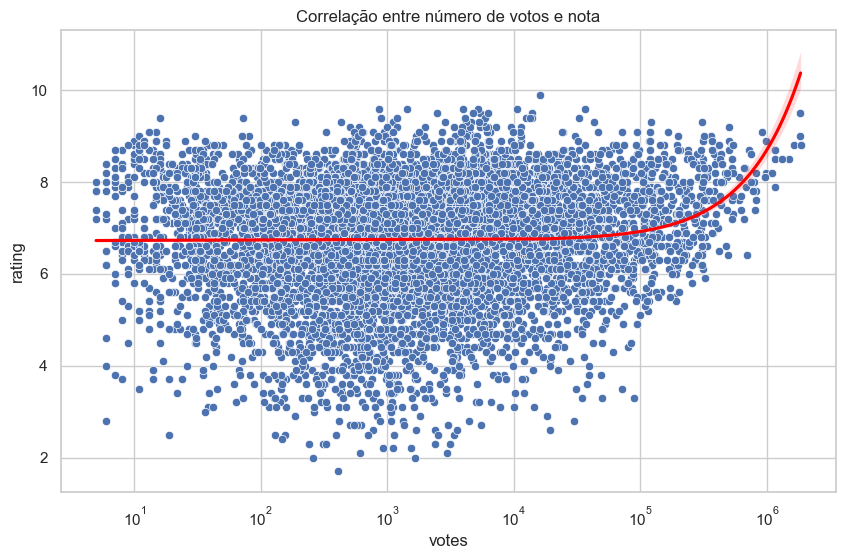

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rating', data=data)
sns.regplot(x='votes', y='rating', data=data, scatter=False, color='red', label='Regressão Linear')
plt.title('Correlação entre número de votos e nota')
plt.xscale('log')  # Usar escala logarítmica para votos
plt.show()

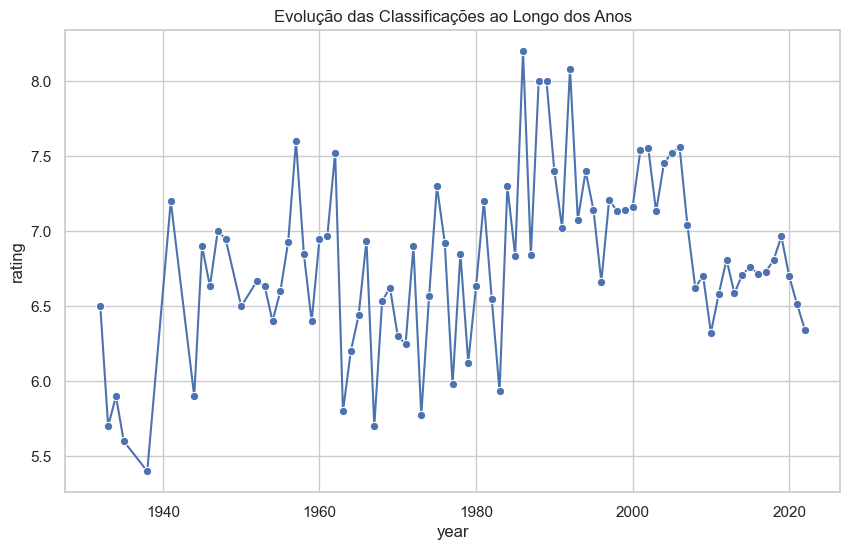

In [9]:
# Converter a coluna 'year' para string para usar .str.extract()
data['year'] = data['year'].astype(str).str.extract(r'(\d{4})').astype(float)

# Remover valores NaN após a extração (se necessário)
data = data.dropna(subset=['year'])

# Agrupar por ano e calcular a média das classificações
ratings_by_year = data.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rating', data=ratings_by_year, marker='o')
plt.title('Evolução das Classificações ao Longo dos Anos')
plt.show()

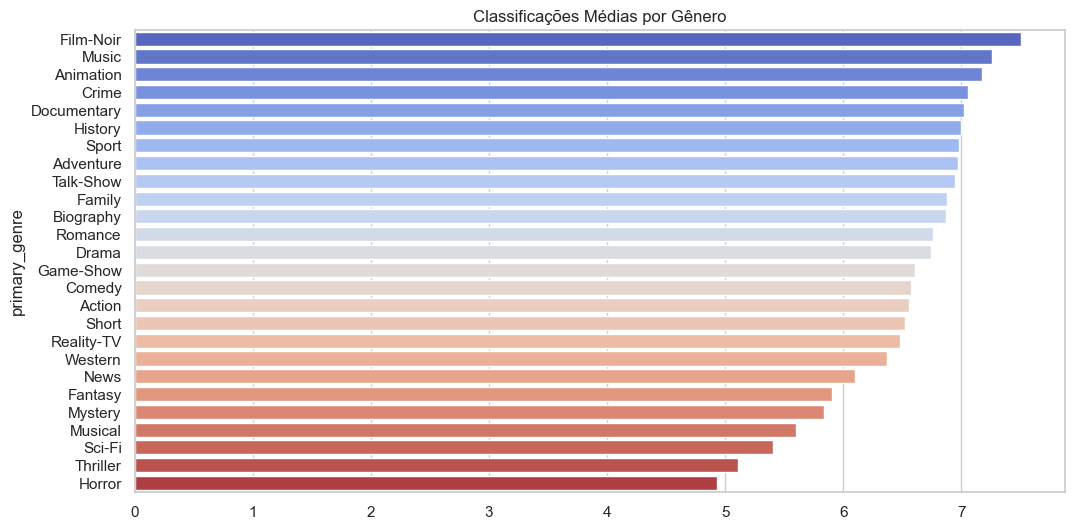

In [10]:
plt.figure(figsize=(12, 6))
avg_ratings_by_genre = data.groupby('primary_genre')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings_by_genre.values, y=avg_ratings_by_genre.index, palette='coolwarm')
plt.title('Classificações Médias por Gênero')
plt.show()

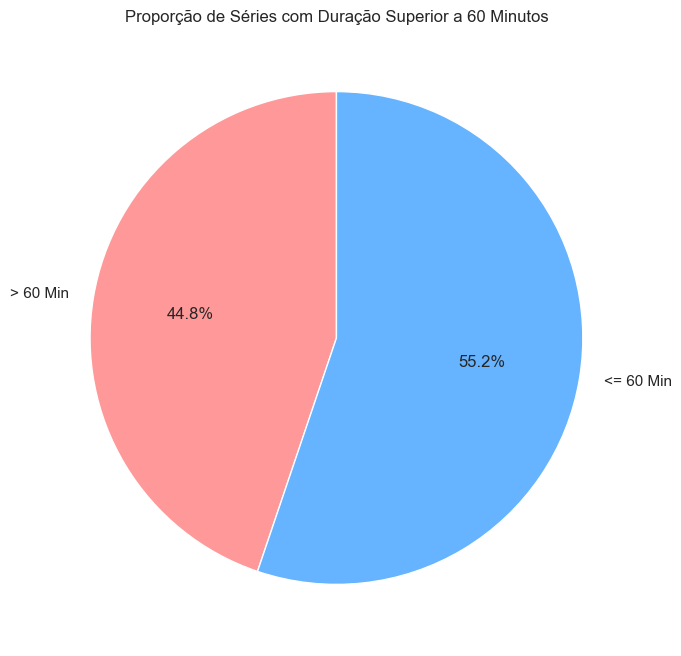

In [11]:
# Filtrar séries com duração superior a 60 minutos
long_episodes = data[data['duration'] > 60]
short_episodes = data[data['duration'] <= 60]

# Tabela de proporção
labels = ['> 60 Min', '<= 60 Min']
sizes = [len(long_episodes), len(short_episodes)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proporção de Séries com Duração Superior a 60 Minutos')
plt.show()

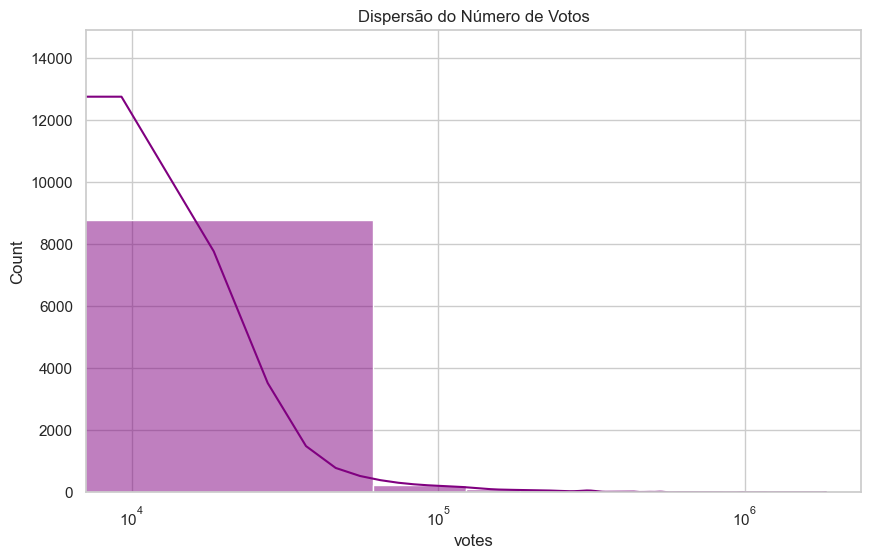

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['votes'], bins=30, kde=True, color='purple')
plt.title('Dispersão do Número de Votos')
plt.xscale('log')  # Usar escala logarítmica para votos
plt.show()

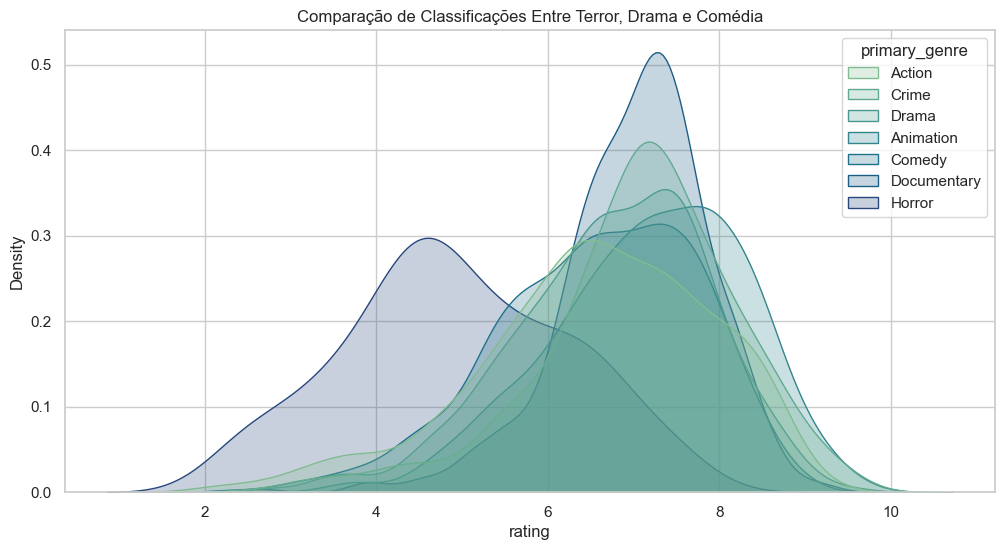

In [13]:
# Filtrar gêneros de interesse
genres_of_interest = data[data['primary_genre'].isin(['Horror', 'Drama', 'Comedy','Animation','Documentary','Crime','Action'])]

plt.figure(figsize=(12, 6))
sns.kdeplot(data=genres_of_interest, x='rating', hue='primary_genre', fill=True, palette='crest', common_norm=False)
plt.title('Comparação de Classificações Entre Terror, Drama e Comédia')
plt.show()